# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [2]:
X_train = pd.read_csv(r"C:\Users\felip\ebac\mod 17\X_train.csv",)

In [6]:
X_train.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
y_train = pd.read_csv(r"C:\Users\felip\ebac\mod 17\y_train.csv")

In [13]:
y_train.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
X_test = pd.read_csv(r"C:\Users\felip\ebac\mod 17\X_test.csv",)
X_test.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
y_test = pd.read_csv(r"C:\Users\felip\ebac\mod 17\y_test.csv")
y_test.drop('Unnamed: 0',axis=1,inplace=True)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [22]:
X_train_ , X_valid , y_train_ , y_valid = train_test_split(X_train,y_train,test_size = 0.25,random_state=7)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [45]:
clf0 = DecisionTreeClassifier(max_depth=4,random_state=7).fit(X_train_,y_train_)

In [49]:
lista = clf0.feature_importances_

In [50]:
indices = sorted(range(len(lista)),key=lambda i:lista[i], reverse=True)

In [70]:
indices = indices[:3]

In [71]:
indices

[53, 266, 42]

In [75]:
X_train_ = X_train_.iloc[:,[53,266,42]]

In [79]:
X_test = X_test.iloc[:,[53,266,42]]

In [81]:
X_valid = X_valid.iloc[:,[53,266,42]]

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [92]:
%%time
clf0 = DecisionTreeClassifier(max_depth=4,random_state=7).cost_complexity_pruning_path(X_train_,y_train_)
ccp_alphas,impurities = clf0.ccp_alphas, clf0.impurities

CPU times: total: 46.9 ms
Wall time: 40 ms


In [93]:
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf_ = DecisionTreeClassifier(random_state=7).fit(X_train_,y_train_)
    clfs.append(clf_)

CPU times: total: 422 ms
Wall time: 421 ms


In [94]:
%%time
train_scores = []
valid_scores = []
for clf__ in clfs:
    score_train = clf__.score(X_train_,y_train_)
    train_scores.append(score_train)
    score_valid = clf__.score(X_valid,y_valid)
    valid_scores.append(score_valid)
    

CPU times: total: 125 ms
Wall time: 129 ms


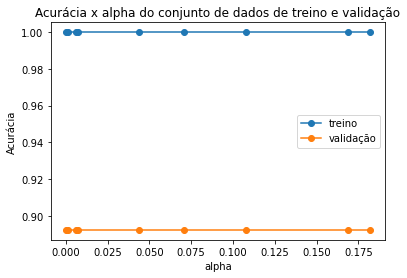

CPU times: total: 1.89 s
Wall time: 2.24 s


In [96]:
%%time
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [103]:
%%time
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

CPU times: total: 0 ns
Wall time: 0 ns


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [104]:
acuracia_test = melhor_arvore.score(X_test,y_test)
print(acuracia_test)

0.7105531048523923


C:\Users\felip\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


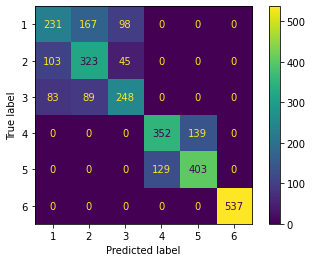

In [105]:
plot_confusion_matrix(melhor_arvore,X_test,y_test)